# Analysis of Anscombe's Quartet Dataset
<div style="text-align: right"> Fundamentals of Data Analysis</div>
<div style="text-align: right"> Shane Healy, OCT-2018</div>


# Background

The Anscombe Quartet Dataset was created by Frank Anscombe in 1973 <sup>[1](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)</sup>.

Frank Anscombe <sup>[2](https://en.wikipedia.org/wiki/Frank_Anscombe)</sup> was a statistician and lecturer, image shown below <sup>[3](https://en.wikipedia.org/w/index.php?curid=23138907)</sup>. 
![Frank Anscombe](https://upload.wikimedia.org/wikipedia/en/d/d5/Francis_Anscombe.jpeg)

His work contributed to anaysis of residuals in linear regression which is measure of the deviation of a value from it theoretical value.

His interest in statistical computing provided a rationale that computers should perform calculations, generate statistics, as well as plotting graphs. His creation of the Anscombe Quartet Dataset illustrates the importance of plotting data sets and not relying solely on descriptive statistics. 

In the Autodesk Research paper, Same Stats Different Graphs, by Justin Matejka and George Fitzmaurice <sup>[4](https://www.autodeskresearch.com/sites/default/files/SameStats-DifferentGraphs.pdf)</sup>, it states that it is not known how Anscombe came up with his datasets. To create graphs of distinctly different shapes which maintaining the same descriptive statistics, the authors describe their method as quoted below:

* Generating a dataset from scratch to have particular statistical properties is relatively difficult
* It is relatively easy to take an existing dataset, modify it slightly, and maintain (nearly) the same statistical properties. 
* With repetition, this process creates a dataset with a different visual appearance from the original, while maintaining the same statistical properties. 
* Further, if the modifications to the dataset are biased to move the points towards a particular goal, the resulting graph can be directed towards a particular visual appearance. 

Therefore it is assumed that Anscombe also used an iterative approach to move data points of an original data set towards the visual appearance in his four data sets while maintaining the same descriptive statistics of each.

# Plotting Dataset

In [1]:
import pandas as pd

In [2]:
# Read in csv file.
df_read = pd.read_csv("asc_data.csv")

In [3]:
# Pandas styling used to highlight null values in dataset
df_read.style.highlight_null(null_color='red')

,Observation,x1,y1,Unnamed: 3,x2,y2,Unnamed: 6,x3,y3,Unnamed: 9,x4,y4
0,1,10,8.04,nan,10,9.14,nan,10,7.46,nan,8,6.58
1,2,8,6.95,nan,8,8.14,nan,8,6.77,nan,8,5.76
2,3,13,7.58,nan,13,8.74,nan,13,12.74,nan,8,7.71
3,4,9,8.81,nan,9,8.77,nan,9,7.11,nan,8,8.84
4,5,11,8.33,nan,11,9.26,nan,11,7.81,nan,8,8.47
5,6,14,9.96,nan,14,8.1,nan,14,8.84,nan,8,7.04
6,7,6,7.24,nan,6,6.13,nan,6,6.08,nan,8,5.25
7,8,4,4.26,nan,4,3.1,nan,4,5.39,nan,19,12.5
8,9,12,10.84,nan,12,9.13,nan,12,8.15,nan,8,5.56
9,10,7,4.82,nan,7,7.26,nan,7,6.42,nan,8,7.91


Anscombe data set was downloaded from Wabash College website,<sup> [5](http://www3.wabash.edu/econometrics/econometricsbook/Chapters/Ch05InterpretingRegression/ExcelFiles/Anscombe.xls)</sup>, and saved as asc_data.csv. 

Pandas styling <sup>[6](http://pandas.pydata.org/pandas-docs/stable/style.html)</sup> highlighted empty or null values. These null values will be dropped to clean the dataframe for future use. 

In [4]:
# Using Pandas to drop unwanted columns
df = df_read.drop(columns=['Unnamed: 3', 'Unnamed: 6', 'Unnamed: 9', 'Observation'])
df

,x1,y1,x2,y2,x3,y3,x4,y4
0,10,8.04,10,9.14,10,7.46,8,6.58
1,8,6.95,8,8.14,8,6.77,8,5.76
2,13,7.58,13,8.74,13,12.74,8,7.71
3,9,8.81,9,8.77,9,7.11,8,8.84
4,11,8.33,11,9.26,11,7.81,8,8.47
5,14,9.96,14,8.10,14,8.84,8,7.04
6,6,7.24,6,6.13,6,6.08,8,5.25
7,4,4.26,4,3.10,4,5.39,19,12.50
8,12,10.84,12,9.13,12,8.15,8,5.56
9,7,4.82,7,7.26,7,6.42,8,7.91


To visualise the data, Pandas plotting is used. 

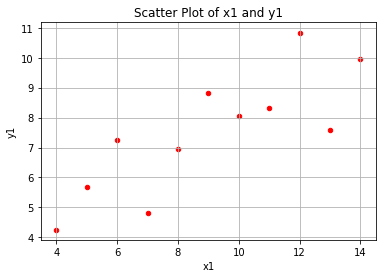

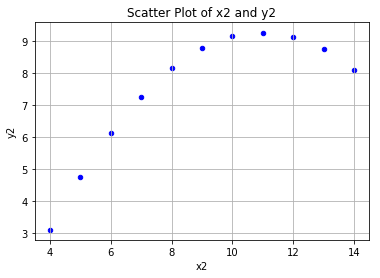

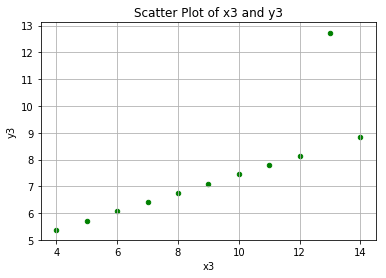

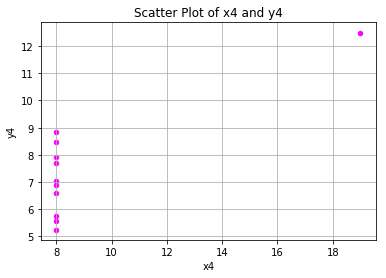

In [5]:
# Plots of x and y values as scatter plots.
df.plot(kind='scatter',x='x1',y='y1',color='red', title="Scatter Plot of x1 and y1",grid=True)
df.plot(kind='scatter',x='x2',y='y2',color='blue', title="Scatter Plot of x2 and y2",grid=True)
df.plot(kind='scatter',x='x3',y='y3',color='green', title="Scatter Plot of x3 and y3",grid=True)
df.plot(kind='scatter',x='x4',y='y4',color='magenta', title="Scatter Plot of x4 and y4",grid=True)


# Descriptive Statistics

In [6]:
# Dataframe describe used to provide descriptive statistics on data set. Pandas styling used for clarity of display.
df.describe().style.set_properties(**{'text-align': 'right'})

,x1,y1,x2,y2,x3,y3,x4,y4
count,11,11,11,11,11,11,11,11
mean,9,7.50091,9,7.50091,9,7.5,9,7.50091
std,3.31662,2.03157,3.31662,2.03166,3.31662,2.03042,3.31662,2.03058
min,4,4.26,4,3.1,4,5.39,8,5.25
25%,6.5,6.315,6.5,6.695,6.5,6.25,8,6.17
50%,9,7.58,9,8.14,9,7.11,8,7.04
75%,11.5,8.57,11.5,8.95,11.5,7.98,8,8.19
max,14,10.84,14,9.26,14,12.74,19,12.5


In [7]:
# Slicing descriptive statistics dataframe to compare different x data sets
stats = df.describe()
stats.iloc[:,[0,2,4,6]]


,x1,x2,x3,x4
count,11.000000,11.000000,11.000000,11.000000
mean,9.000000,9.000000,9.000000,9.000000
std,3.316625,3.316625,3.316625,3.316625
min,4.000000,4.000000,4.000000,8.000000
25%,6.500000,6.500000,6.500000,8.000000
50%,9.000000,9.000000,9.000000,8.000000
75%,11.500000,11.500000,11.500000,8.000000
max,14.000000,14.000000,14.000000,19.000000


In [8]:
# Slicing descriptive statistics dataframe to compare different y data sets
stats.iloc[:,[1,3,5,7]] 

,y1,y2,y3,y4
count,11.000000,11.000000,11.000000,11.000000
mean,7.500909,7.500909,7.500000,7.500909
std,2.031568,2.031657,2.030424,2.030579
min,4.260000,3.100000,5.390000,5.250000
25%,6.315000,6.695000,6.250000,6.170000
50%,7.580000,8.140000,7.110000,7.040000
75%,8.570000,8.950000,7.980000,8.190000
max,10.840000,9.260000,12.740000,12.500000


Values for mean and standard deviation, of x and y data sets, are equivalent. 

The measures of position, percentiles, as well as min and max show marginal variability.

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
# Create arrays to hold data values from dataframe by referencing labels
x1 = df["x1"].values
y1 = df["y1"].values
x2 = df["x2"].values
y2 = df["y2"].values
x3 = df["x3"].values
y3 = df["y3"].values
x4 = df["x4"].values
y4 = df["y4"].values

In [11]:
# Write function for Linear Regression

def slr(x,y):
# Calculate the means of x and y.
    x_avg = np.mean(x)
    y_avg = np.mean(y)

    x_zero = x - x_avg
    y_zero = y - y_avg

# The best m, slope for line, is found by the following calculation.
    m = np.sum(x_zero * y_zero) / np.sum(x_zero * x_zero)

# Use m from above to calculate the best c, intercept.
    c = y_avg - m * x_avg

    return m,c


In [12]:
print("The m and c values for x1y1 are: ",slr(x1,y1))

The m and c values for x1y1 are:  (0.5000909090909091, 3.0000909090909103)


Therefore, the linear equation to describe the relationship between x1 and y1 is:

$ y1 = 0.5000909090909091*x1 + 3.0000909090909103$

The numpy.polyfit function will output the same details as slr function detailed above.

In [13]:
# First degree polynomial is linear
# Assigning values to m, slope, and c, y intercept. 
m1,c1 = np.polyfit(x1,y1,1)
m2,c2 = np.polyfit(x2,y2,1)
m3,c3 = np.polyfit(x3,y3,1)
m4,c4 = np.polyfit(x4,y4,1)

In [14]:
# Checking that the polyfit function matches slr function
print("The outputted values for m1, slope, and c1, intercept, are %6.4f" % m1,"and %6.4f" % c1)

The outputted values for m1, slope, and c1, intercept, are 0.5001 and 3.0001


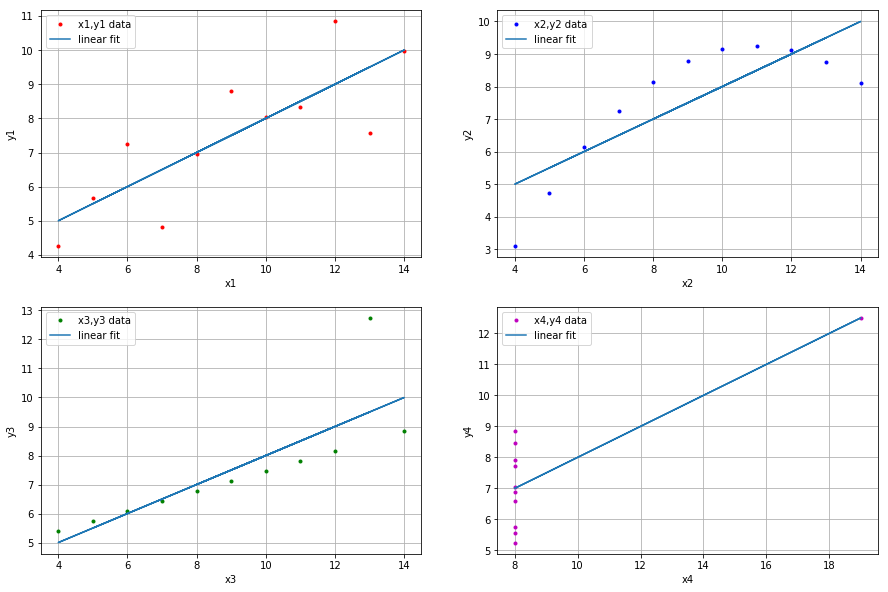

In [15]:
# Setting figure and defining size of subplots
fig = plt.figure(figsize=(15,10))

# Defining 4 subplots to display Anscombe data sets with linear fit.

#x1y1 data
plt.subplot(2, 2, 1)
plt.plot(x1,y1,'r.',label='x1,y1 data')
plt.plot(x1,m1*x1+c1,label='linear fit')
plt.xlabel('x1')
plt.ylabel('y1')
plt.grid(True)
plt.legend()

#x2y2 data
plt.subplot(2, 2, 2)
plt.plot(x2,y2,'b.',label='x2,y2 data')
plt.plot(x2,m2*x2+c2,label='linear fit')
plt.xlabel('x2')
plt.ylabel('y2')
plt.grid(True)
plt.legend()

#x3y3 data
plt.subplot(2, 2, 3)
plt.plot(x3,y3,'g.',label='x3,y3 data')
plt.plot(x3,m3*x3+c3,label='linear fit')
plt.xlabel('x3')
plt.ylabel('y3')
plt.grid(True)
plt.legend()

#x4y4 data
plt.subplot(2, 2, 4)
plt.plot(x4,y4,'m.',label='x4,y4 data')
plt.plot(x4,m4*x4+c4,label='linear fit')
plt.xlabel('x4')
plt.ylabel('y4')
plt.grid(True)
plt.legend()

plt.show()


Covariance,<sup>[7](https://en.wikipedia.org/wiki/Covariance)</sup>, is a measure of the variability between two variables and describes the degree by which a variable's value will change relative to the other variable, i.e. linear relationship between two variables. 

The normalised or dimensionless value of covariance is the Correlation Coefficient. This ranges from -1(perfect decreasing correlation) to 0 (no correlation) to 1 (perfect increasing correlation). 

The correlation coefficients for the four data sets defined by Anscombe will be calculated. 

In [16]:
corr_x1y1 = np.corrcoef(x1,y1)[0][1]
corr_x2y2 = np.corrcoef(x2,y2)[0][1]
corr_x3y3 = np.corrcoef(x3,y3)[0][1]
corr_x4y4 = np.corrcoef(x4,y4)[0][1]
print("The correlation coefficient between x1 and y1 is %6.4f" % corr_x1y1)
print("The correlation coefficient between x2 and y2 is %6.4f" % corr_x2y2)
print("The correlation coefficient between x3 and y3 is %6.4f" % corr_x3y3)
print("The correlation coefficient between x4 and y4 is %6.4f" % corr_x4y4)


The correlation coefficient between x1 and y1 is 0.8164
The correlation coefficient between x2 and y2 is 0.8162
The correlation coefficient between x3 and y3 is 0.8163
The correlation coefficient between x4 and y4 is 0.8165


# Discussion of Anscombe's Quartet Datasets

The main learning from Anscombe's Quartet Datasets is that statistics describing data sets can be misleading and highlights the importance of data visualisation as part of data analysis. 

The descriptive statistics of the four data sets are nearly identical. 

| Descriptive Statistic      | Value           |
| ----------- |---------------|
| Mean of x values | 9 |
| Mean of y values | 7.5 |
| Standard Deviation of x values  | 3.31 | 
| Standard Deviation of y values | 2.03 |   
| Linear equation | $ y = 0.5*x + 3$ |   
| Correlation coefficient between x and y | 0.816 |   

The values describing position, percentiles, max, min, show variability but these do not provide sufficient insight into difference between data sets. 

When plotted, these four data sets differ from one another greatly.

## Data Set 1: x1,y1
There appears to be a noisy but linear relationship between x1 and y1 values. The linear equation $ y = 0.5*x + 3$ describes the relationship between the variables with a correlation coefficient of 0.816. Using scipy.stats, the distribution of x1 and y1 values will be displayed to determine if normally distributed. The code for the operations was adapted from a post on Stack Overflow <sup>[8](https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib)</sup>.

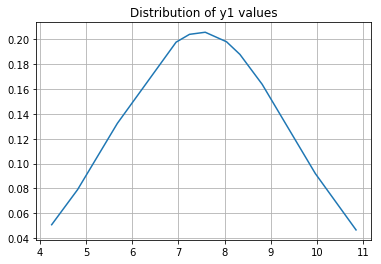

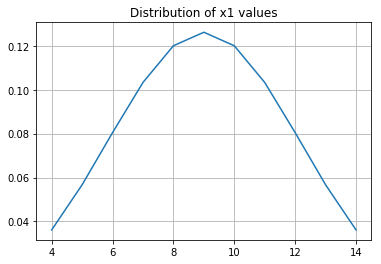

In [17]:
import scipy.stats as stats
# Setting up parameters for y1 values
y1norm = list(y1) # list() used to prevent reference of same object.
y1norm.sort()
y1mean = np.mean(y1norm)
y1std = np.std(y1norm)

# Plot to visualise distribution of y1 values
pdf = stats.norm.pdf(y1norm, y1mean, y1std)
plt.title("Distribution of y1 values")
plt.plot(y1norm, pdf)
plt.grid(True)
plt.show()



# Setting up parameters for x1 values
x1norm = list(x1) # list() used to prevent reference of same object.
x1norm.sort()
x1mean = np.mean(x1norm)
x1std = np.std(x1norm)

# Plot to visualise distribution of y1 values
pdf = stats.norm.pdf(x1norm, x1mean, x1std)
plt.title("Distribution of x1 values")
plt.plot(x1norm, pdf)
plt.grid(True)
plt.show()


The distribution of y1 values shows a normal distribution centred around 7.5.

The distribution of x1 values shows a normal distribution centred around 9.0.

The descriptive statistics accurately describe the x1y1 data set.

## Data Set 2: x2,y2

When plotted, the x2y2 data set appears quadratic.

Equation for a quadratic line is:  $y = q1x^2 + q2x + q3$ 

In [18]:
# Three constants to describe quadratic outputted as q1, q2 and q3
q1,q2,q3 = np.polyfit(x2,y2,2)
q1,q2,q3

(-0.126713286713287, 2.7808391608391636, -5.9957342657342645)

In [19]:
y_val = (q1*x2**2)+(q2*x2)+q3
y_val # predicted y values when x2 supplied as input

array([9.14132867, 8.14132867, 8.74062937, 8.76804196, 9.26118881,
       8.10020979, 6.12762238, 3.10020979, 9.12762238, 7.26118881,
       4.74062937])

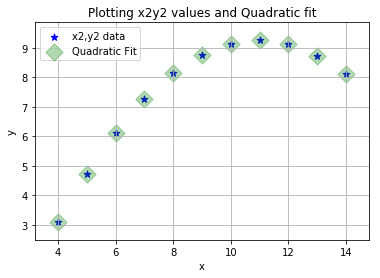

In [20]:
# Scatter Plots to visualise if quadratic fit is aligned with x2y2 data points.
plt.scatter(x2,y2,color = "blue", label='x2,y2 data',marker='*',s=50 )
plt.scatter(x2,y_val,color = "green", label='Quadratic Fit',marker='D',s=150, alpha="0.3") # markers transparent and increase size.
plt.title("Plotting x2y2 values and Quadratic fit")
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend()

plt.show()

The above plot displays that the relationship between x2 and y2 can be described as a quadratic relationship with equation: $$y = -0.127x^2 + 2.781x - 5.996$$ 

## Data Set 3: x3,y3

The correlation coefficients for the four x,y data sets were found to be the same. 

Reviewing the plot for x3 v y3, there is one outlier from an otherwise apparently linear relationship.
The outlier will be removed to determine its impact on correlation coefficient. The data points for the outlier are at index 2.

In [21]:
# New arrays created to remove values at index 2 of original data set.
x3_del = np.delete(x3,2)
y3_del = np.delete(y3,2)

corr_x3y3_del = np.corrcoef(x3_del,y3_del)[0][1]
print("The correlation coefficient between x3 and y3, with data at index 2 deleted, is %6.3f" % corr_x3y3_del)

The correlation coefficient between x3 and y3, with data at index 2 deleted, is  1.000


Therefore, for the x3y3 data set, with the outlier at index 2 deleted, there is a linearly increasing perfect correlation between x3 and y3. 

This demonstrates the impact of one data point on the correlation coefficient of a data set. 

## Data Set 4: x4,y4

Reviewing the plot for x4 v y4, there is one outlier. Apart from the outlier, all x values are 8. This data set demonstrates the impact of one data point on the correlation coefficient although there is no relationship between x and y values.

## References

1. Anscombe's Quartyt, Wikipedia, https://en.wikipedia.org/wiki/Anscombe%27s_quartet

2. Frank Anscombe, Wikipedia, https://en.wikipedia.org/wiki/Frank_Anscombe

3. Frank Anscombe Image, By Yale Bulletin & CalendarNovember 2, 2001: Volume 30, Number 9, Fair use, https://en.wikipedia.org/w/index.php?curid=23138907

4. Same Stats, Different Graphs: Generating Datasets with Varied Appearance and
Identical Statistics through Simulated Annealing, Justin Matejka and George Fitzmaurice https://www.autodeskresearch.com/sites/default/files/SameStats-DifferentGraphs.pdf
1. Anscombe quartet dataset source, http://www3.wabash.edu/econometrics/econometricsbook/Chapters/Ch05InterpretingRegression/ExcelFiles/Anscombe.xls

2. Pandas documentation for Styles, http://pandas.pydata.org/pandas-docs/stable/style.html

3. Covariance, Wikipedia, https://en.wikipedia.org/wiki/Covariance

4. Plot Normal Distribution, Stack Overflow, https://stackoverflow.com/questions/20011494/plot-normal-distribution-with-matplotlib
